In [44]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder



In [45]:
df = pd.read_csv("cars.csv")
print(df.head())

     Brand  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0   Toyota  2018              50000    Petrol       Manual      First   
1    Honda  2019              40000    Petrol    Automatic     Second   
2     Ford  2017              20000    Petrol    Automatic      First   
3   Maruti  2020              30000    Diesel       Manual      Third   
4  Hyundai  2016              60000    Diesel    Automatic     Second   

   Mileage  Engine  Power  Seats    Price  
0       15    1498  108.0    5.0   800000  
1       17    1597  140.0    5.0  1000000  
2       10    4951    NaN    4.0  2500000  
3       23    1248    NaN    5.0   600000  
4       18    1999  194.0    5.0   850000  


In [46]:
df.isnull()

,Brand,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,True,True,False
97,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False


In [47]:
df.isnull().sum()

Brand                 0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                11
Seats                 9
Price                 0
dtype: int64

In [48]:
imputer = SimpleImputer(strategy='median')
df["Power"] = imputer.fit_transform(df[["Power"]])

In [49]:
df["Power"].isnull().sum()

0

In [50]:
imputer = SimpleImputer(strategy='median')
df["Seats"] = imputer.fit_transform(df[["Seats"]])

In [51]:
df.isnull().sum()

Brand                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [52]:
df

,Brand,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Toyota,2018,50000,Petrol,Manual,First,15,1498,108.0,5.0,800000
1,Honda,2019,40000,Petrol,Automatic,Second,17,1597,140.0,5.0,1000000
2,Ford,2017,20000,Petrol,Automatic,First,10,4951,141.0,4.0,2500000
3,Maruti,2020,30000,Diesel,Manual,Third,23,1248,141.0,5.0,600000
4,Hyundai,2016,60000,Diesel,Automatic,Second,18,1999,194.0,5.0,850000
...,...,...,...,...,...,...,...,...,...,...,...
95,Mercedes,2019,22000,Diesel,Automatic,First,16,1950,191.0,5.0,2900000
96,Toyota,2017,38000,Diesel,Manual,Second,13,2755,141.0,5.0,1400000
97,Ford,2018,26000,Petrol,Manual,Third,18,1497,121.0,5.0,750000
98,Hyundai,2019,24000,Petrol,Automatic,Second,17,1497,113.0,5.0,850000


In [53]:
df["Brand"].unique()

array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes'], dtype=object)

In [54]:
mapping = {
    'Toyota': 1,
    'Honda': 2,
    'Ford': 3,
    'Maruti': 4,
    'Hyundai': 5,
    'Tata': 6,
    'Mahindra': 7,
    'Volkswagen': 8,
    'Audi': 9,
    'BMW': 10,
    'Mercedes': 11
}
df['Brand'] = df['Brand'].map(mapping)

In [55]:
df

,Brand,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,2018,50000,Petrol,Manual,First,15,1498,108.0,5.0,800000
1,2,2019,40000,Petrol,Automatic,Second,17,1597,140.0,5.0,1000000
2,3,2017,20000,Petrol,Automatic,First,10,4951,141.0,4.0,2500000
3,4,2020,30000,Diesel,Manual,Third,23,1248,141.0,5.0,600000
4,5,2016,60000,Diesel,Automatic,Second,18,1999,194.0,5.0,850000
...,...,...,...,...,...,...,...,...,...,...,...
95,11,2019,22000,Diesel,Automatic,First,16,1950,191.0,5.0,2900000
96,1,2017,38000,Diesel,Manual,Second,13,2755,141.0,5.0,1400000
97,3,2018,26000,Petrol,Manual,Third,18,1497,121.0,5.0,750000
98,5,2019,24000,Petrol,Automatic,Second,17,1497,113.0,5.0,850000


In [56]:
df["Owner_Type"].unique()

array(['First', 'Second', 'Third'], dtype=object)

In [57]:
mapping = {
    'First': 1,
    'Second': 2,
    'Third': 3
}
df['Owner_Type'] = df['Owner_Type'].map(mapping)

In [58]:
df

,Brand,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,2018,50000,Petrol,Manual,1,15,1498,108.0,5.0,800000
1,2,2019,40000,Petrol,Automatic,2,17,1597,140.0,5.0,1000000
2,3,2017,20000,Petrol,Automatic,1,10,4951,141.0,4.0,2500000
3,4,2020,30000,Diesel,Manual,3,23,1248,141.0,5.0,600000
4,5,2016,60000,Diesel,Automatic,2,18,1999,194.0,5.0,850000
...,...,...,...,...,...,...,...,...,...,...,...
95,11,2019,22000,Diesel,Automatic,1,16,1950,191.0,5.0,2900000
96,1,2017,38000,Diesel,Manual,2,13,2755,141.0,5.0,1400000
97,3,2018,26000,Petrol,Manual,3,18,1497,121.0,5.0,750000
98,5,2019,24000,Petrol,Automatic,2,17,1497,113.0,5.0,850000


In [59]:
encoder = ce.OneHotEncoder(cols=['Fuel_Type','Transmission'], use_cat_names=True)

In [60]:
df_encoded=encoder.fit_transform(df)

In [61]:
df_encoded

,Brand,Year,Kilometers_Driven,Fuel_Type_Petrol,Fuel_Type_Diesel,Transmission_Manual,Transmission_Automatic,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,2018,50000,1,0,1,0,1,15,1498,108.0,5.0,800000
1,2,2019,40000,1,0,0,1,2,17,1597,140.0,5.0,1000000
2,3,2017,20000,1,0,0,1,1,10,4951,141.0,4.0,2500000
3,4,2020,30000,0,1,1,0,3,23,1248,141.0,5.0,600000
4,5,2016,60000,0,1,0,1,2,18,1999,194.0,5.0,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11,2019,22000,0,1,0,1,1,16,1950,191.0,5.0,2900000
96,1,2017,38000,0,1,1,0,2,13,2755,141.0,5.0,1400000
97,3,2018,26000,1,0,1,0,3,18,1497,121.0,5.0,750000
98,5,2019,24000,1,0,0,1,2,17,1497,113.0,5.0,850000


In [62]:
X = df_encoded.iloc[:, :-1].values  
Y = df_encoded.iloc[:, -1].values

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

In [65]:
model = LinearRegression()

In [66]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [67]:
y_pred = model.predict(X_test_scaled)
y_pred_train=model.predict(X_train_scaled)

In [68]:
df

,Brand,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,2018,50000,Petrol,Manual,1,15,1498,108.0,5.0,800000
1,2,2019,40000,Petrol,Automatic,2,17,1597,140.0,5.0,1000000
2,3,2017,20000,Petrol,Automatic,1,10,4951,141.0,4.0,2500000
3,4,2020,30000,Diesel,Manual,3,23,1248,141.0,5.0,600000
4,5,2016,60000,Diesel,Automatic,2,18,1999,194.0,5.0,850000
...,...,...,...,...,...,...,...,...,...,...,...
95,11,2019,22000,Diesel,Automatic,1,16,1950,191.0,5.0,2900000
96,1,2017,38000,Diesel,Manual,2,13,2755,141.0,5.0,1400000
97,3,2018,26000,Petrol,Manual,3,18,1497,121.0,5.0,750000
98,5,2019,24000,Petrol,Automatic,2,17,1497,113.0,5.0,850000


In [69]:
print(model.predict(scaler.transform([[1,2018,50000,1,0,1,0,1,10,1689,109,5]])))


[432552.6075132]


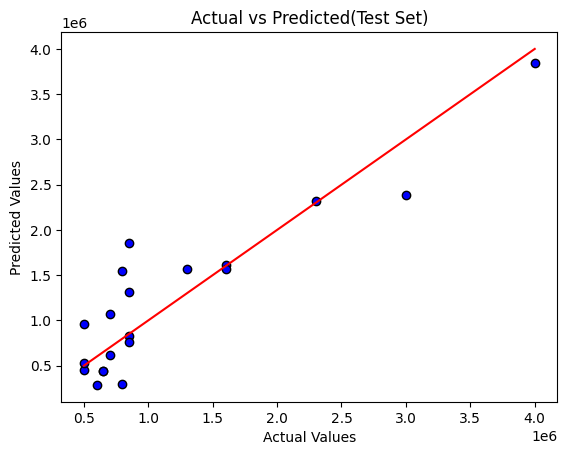

In [70]:
plt.scatter(y_test, y_pred, color='blue', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red') 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted(Test Set)')
plt.show()

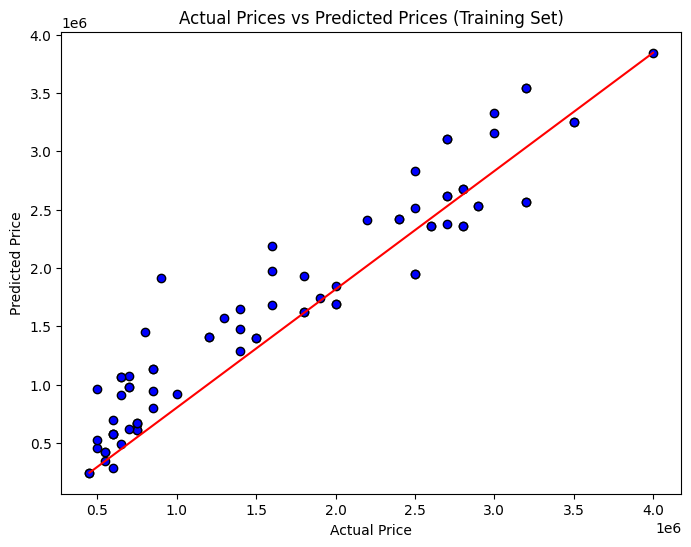

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='blue', edgecolor='black')
plt.plot([min(y_train), max(y_train)], [min(y_pred_train), max(y_pred_train)],  color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices (Training Set)')
plt.show()


In [72]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.8142433257247287


In [73]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 280998.32619024883


In [74]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 389770.5684836025


RANDOM FOREST

In [75]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [76]:
np.random.seed(42)
X = np.random.rand(100, 11)  

In [77]:
y_pred = rf_model.predict(X_test_scaled)
y_pred_train = rf_model.predict(X_train_scaled)


In [78]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.8580044476370973


In [79]:
df = pd.DataFrame({ 'y_actual': y_test, 'y_pred': y_pred})
df.head(20)


,y_actual,y_pred
0,1600000,1622000.0
1,700000,740500.0
2,1300000,1325000.0
3,1600000,1499500.0
4,850000,761500.0
5,650000,785000.0
6,850000,845000.0
7,500000,510000.0
8,2300000,2508000.0
9,800000,896000.0


In [80]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 168175.0


In [81]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 340780.07937671477


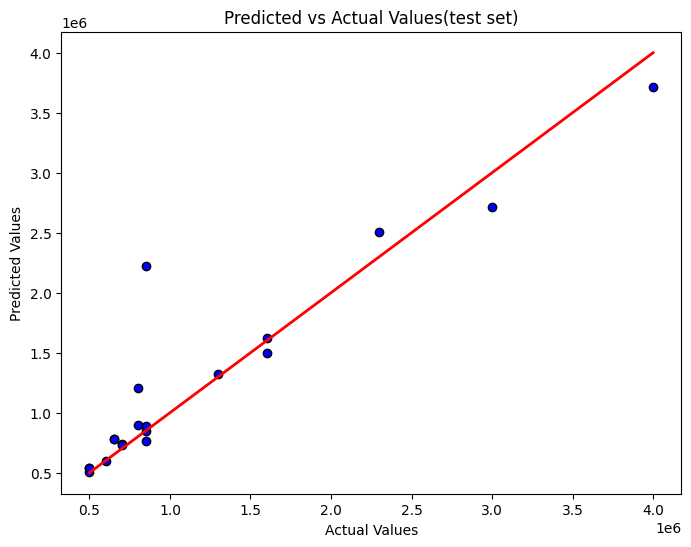

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2) 
plt.title('Predicted vs Actual Values(test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

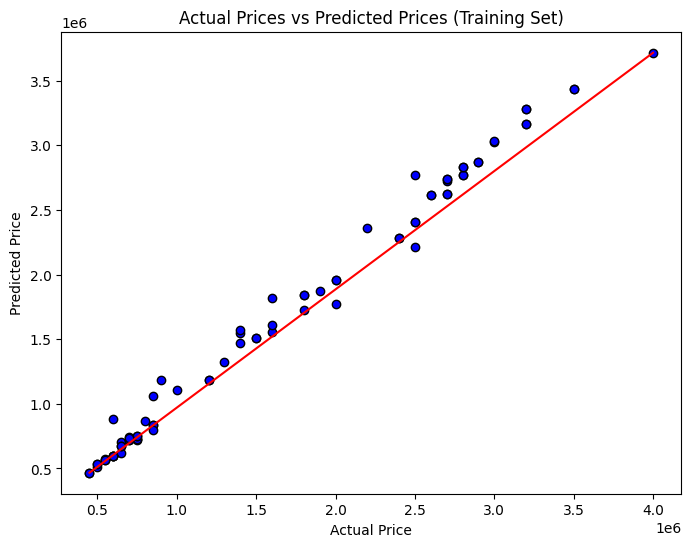

In [83]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='blue', edgecolor='black')
plt.plot([min(y_train), max(y_train)], [min(y_pred_train), max(y_pred_train)],  color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices (Training Set)')
plt.show()
